# Outlier Detection Tutorial

## Introduction

There are several methods to implement outlier detection, but first we require some fundamentals. First, we want to distinguish between two terms: `outlier` and `anomaly`. 

* **Outlier**: Any data point that is not considered "normal" or an inlier.
* **Anomaly**: Any data point that is of significant interest to an analyst, potentially identified as an outlier.

In summary, outlier detection tries to identify data-points among a data set that does not appear to conform to the "normal" distribution of the data.  (Do not confuse "normal" with the Normal Distribution)

## Anomaly Detection

Anomalies are heavily dependent on the context or problem that an analyst is concerned about. Here are some example of context:

* Data-points considerably outside the range of the normal data (Outliers)
* Data-points which are expected to appear in the data, but are missing (Holes)
* Data-points that are not occuring at expected intervals (temporal anomalies)
* Data-points that do the wrong thing after a period of time (sequential anomalies)
* Data-points masquerading as normal data (masquerade anomalies)

In order to do anomaly detection, its important to first identify the type of anomalies that may exist.  We can use _unsupervised methods_ to do _outlier detection_, identifying appropriate features through analysis and visualization and using the appropriate features and algorithms to identify outliers.  

Using the set of _significant outliers_, we can label the normal data vs the abnormal data, and generate _supervised_ and _semi-supervised_ anomaly detection algorithms to identify anomalies. 

* **Unsupervised**: _Outlier Detection_
* **Supervised/Semi-supervised**: _Anomaly Detection_

## Scoring and Labels

Outliers can be detected 


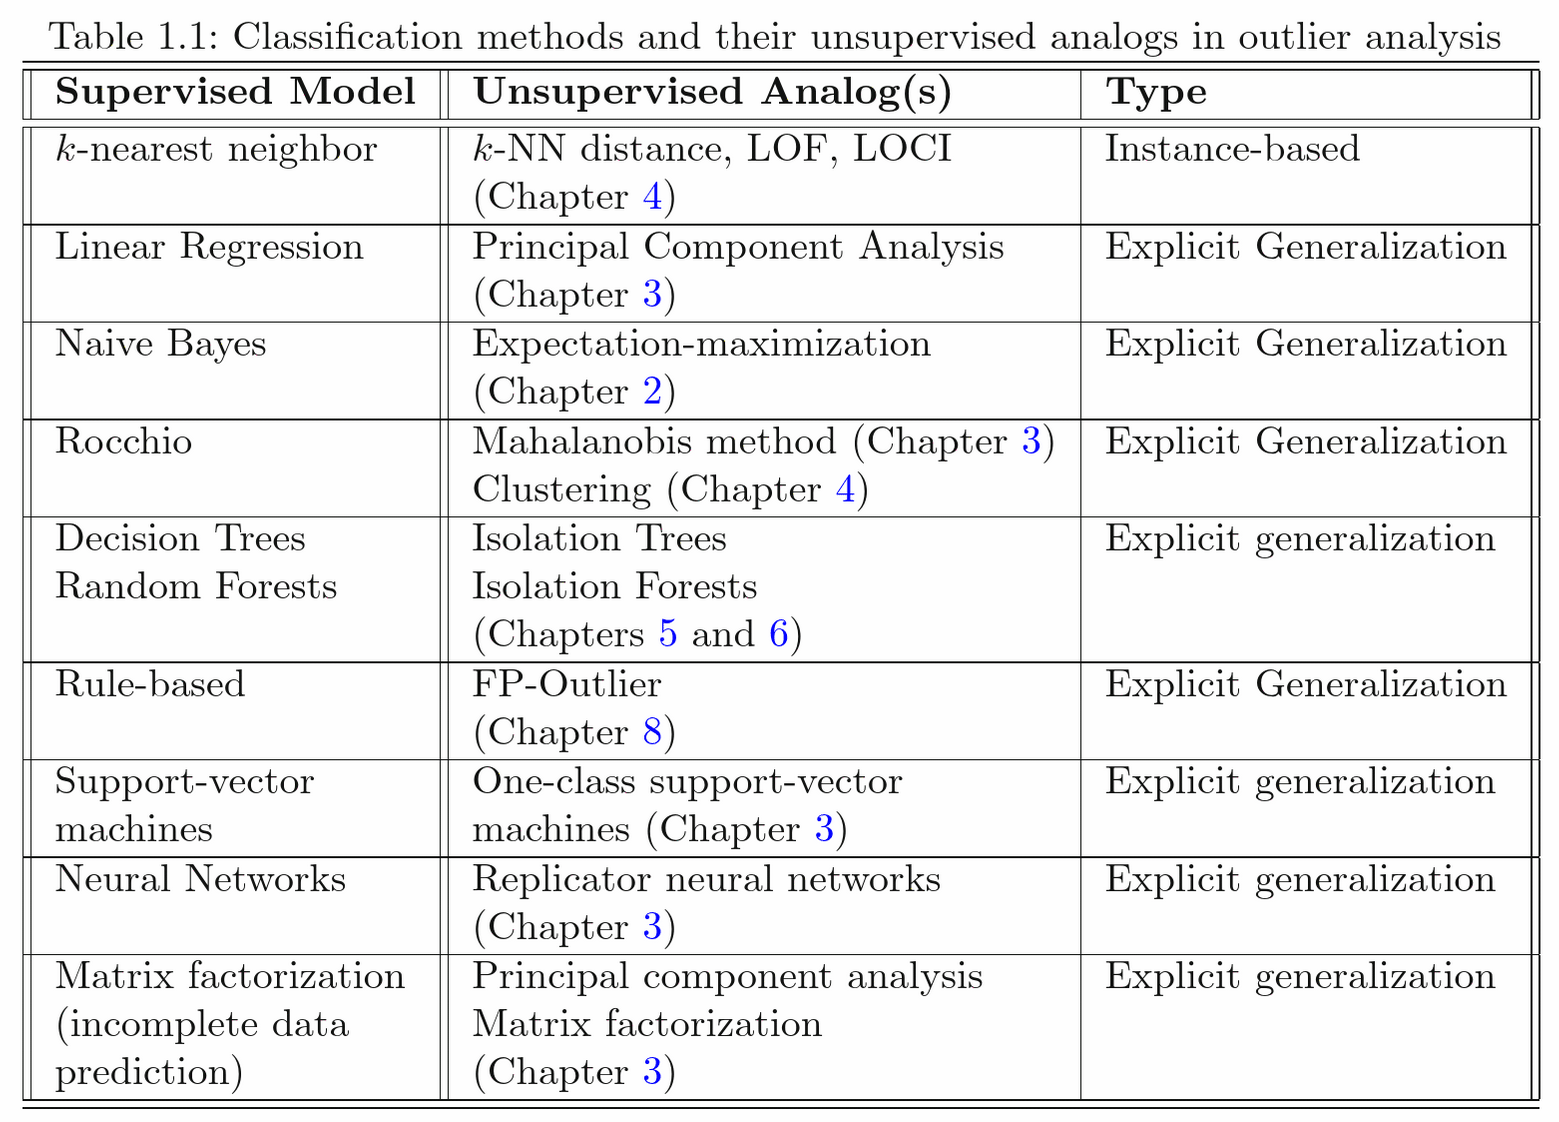
[1]C. C. Aggarwal, Outlier Analysis, 2nd ed. Springer International Publishing, 2016. Accessed: Aug. 05, 2021. [Online]. Available: https://www.springer.com/gp/book/9783319475776

# Isolation Forest

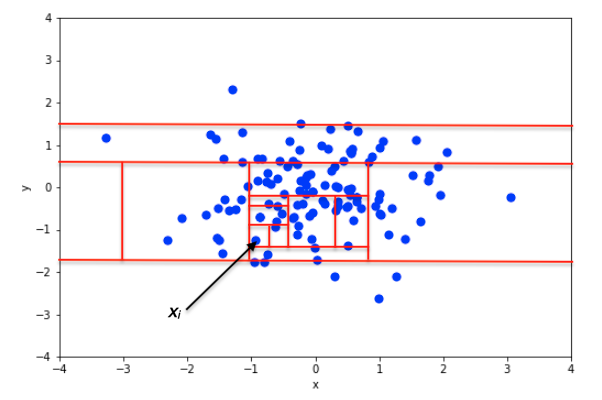
<center><i>By Sal Borrelli - Own work, CC BY-SA 4.0, <a href="https://commons.wikimedia.org/w/index.php?curid=82709489">Wikipedia</a></i></center>

An Isolation Tree is a tree-based outlier detection algorithm.  Given a set of N-dimensional data, a decision tree is generated based on randomly selecting a dimension, and randomly selecting a decision threshold at each node.  

* Normal data will typically have deep tree structures, and will aggregate at long leaf nodes.  
* Anomalous data are short, and aggregate at shallow leaf nodes

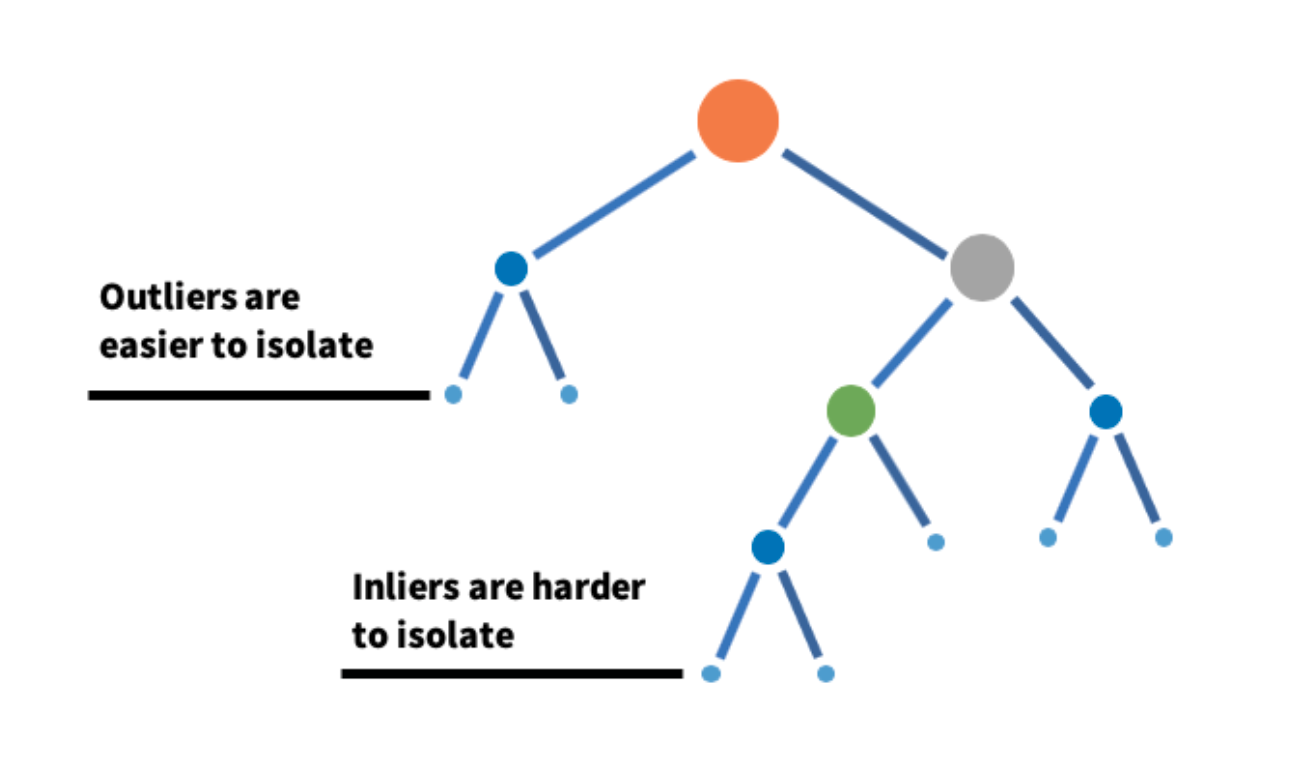
<center><i>By James Verbus - Detecting and preventing abuse on LinkedIn using isolation forests, <a href="https://engineering.linkedin.com/blog/2019/isolation-forest">LinkedIn</a></i></center>

Isolation Forests randomly generate an ensemble of Isolation Trees, and aggregates the decision based on a statistic of leaf depth for each data-point. 

In [1]:
### Imports ###
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt


def plot_outliers(clf, x_normal, x_noise):
    '''
    Plot function for use in this example
    '''

    data = np.vstack((x_normal, x_noise))
    
    predictions = clf.predict(data)
    normal_predictions = clf.predict(x_normal)
    noise_predictions = clf.predict(x_noise)

    tp_points = x_normal[normal_predictions == 1]
    tn_points = x_normal[normal_predictions == -1]
    fp_points = x_noise[noise_predictions == 1]
    fn_points = x_noise[noise_predictions == -1]

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (8, 15))

    tp, tn, fp, fn = len(tp_points), len(tn_points), len(fp_points), len(fn_points)

    acc = float(tp + tn) / float(tp + tn + fp + fn)
    precision = float(tp) / float(tp + fp)
    recall = float(tp) / float(tp + fn)
    tnr = float(tn) / float(tn + fp)
    f1_score = 2.* (precision * recall) / (precision + recall)


    print(f"True Positive: \t{tp:3d}\t\tAccuracy:\t{acc:.3f}\t\tF1 Score: {f1_score:.3f}")
    print(f"True Negative: \t{tn:3d}\t\tPrecision:\t{precision:.3f}")
    print(f"False Positive:\t{fp:3d}\t\tRecall:\t\t{recall:.3f}")
    print(f"False Negative:\t{fn:3d}\t\tTNR:\t\t{tnr:.3f}")

    cm = [[tp, fn], [fp, tn]]
    cax = ax1.matshow(cm)
    fig.colorbar(cax, ax=ax1)
    ax1.set_xticklabels(['']+['Pred. Pos', 'Pred. Neg.'])
    ax1.set_yticklabels(['']+['Act. Pos.', 'Act. Neg.'])
    ax1.text(0, 0, f'TP= {tp}', ha='center', va='center')
    ax1.text(1, 0, f'FN= {fn}', ha='center', va='center')
    ax1.text(0, 1, f'FP= {fp}', ha='center', va='center')
    ax1.text(1, 1, f'TN= {tn}', ha='center', va='center')
    ax1.set_title('Confusion Matrix')

    inlier_predicted_data = data[predictions == 1]
    outlier_predicted_data = data[predictions == -1]

    ax2.scatter(x_normal[:,0], x_normal[:,1], color='blue', label='Normal')
    ax2.scatter(x_noise[:,0], x_noise[:,1], color='red', label='Noise')
    ax2.set_title('Original Data')
    ax2.legend()

    ax3.scatter(inlier_predicted_data[:,0], inlier_predicted_data[:,1], color='blue', label='Inlier')
    ax3.scatter(outlier_predicted_data[:,0], outlier_predicted_data[:,1], color='red', label='Outlier')
    ax3.set_title('Predicted Data')
    ax3.legend()

    fig.tight_layout()
    plt.show()



# Isolation Forest Example

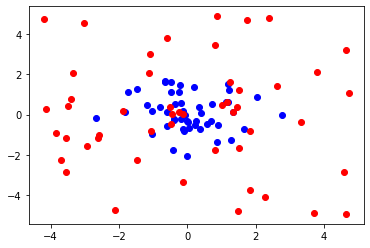

In [68]:
normal_data_count = 50
noise_data_count = 50
x_normal = np.random.normal(size=(normal_data_count, 2))
x_noise = (np.random.random(size=(noise_data_count, 2)) - 0.5) * 10.0

plt.scatter(x_normal[:,0], x_normal[:,1], color='blue')
plt.scatter(x_noise[:,0], x_noise[:,1], color='red')
plt.show()


True Positive: 	 48		Accuracy:	0.500		F1 Score: 0.658
True Negative: 	  2		Precision:	0.706
False Positive:	 20		Recall:		0.615
False Negative:	 30		TNR:		0.091


/home/wmboler/.local/share/virtualenvs/tutorials-4pa6rSgJ/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/wmboler/.local/share/virtualenvs/tutorials-4pa6rSgJ/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


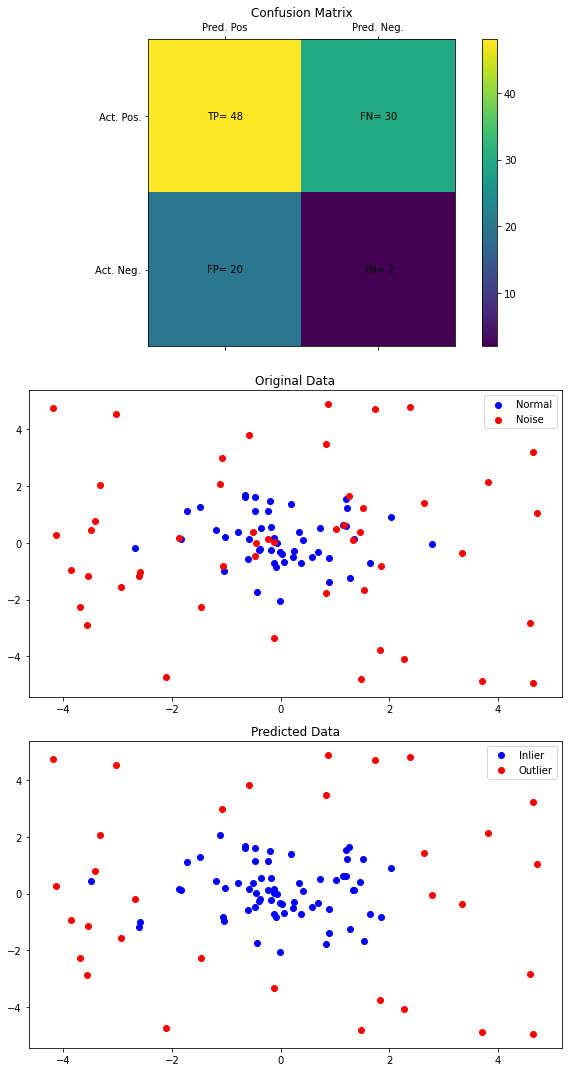

In [77]:
clf = IsolationForest()

# Fit on all data
data = np.vstack((x_normal, x_noise))
clf.fit(data)

plot_outliers(clf, x_normal, x_noise)

# One-Class SVM

We can use a support vector machine (SVM) to model the normal data, specifically a one-class SVM.  The SVM is trained on only a single class, which is the data an anaylist provides as "normal" data.  The SVM models the "normal" data by attempting to fit to it, and classifies each point as True for inliers, and False for outliers. 

True Positive: 	 25		Accuracy:	0.500		F1 Score: 0.500
True Negative: 	 25		Precision:	0.833
False Positive:	  5		Recall:		0.357
False Negative:	 45		TNR:		0.833


/home/wmboler/.local/share/virtualenvs/tutorials-4pa6rSgJ/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/wmboler/.local/share/virtualenvs/tutorials-4pa6rSgJ/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


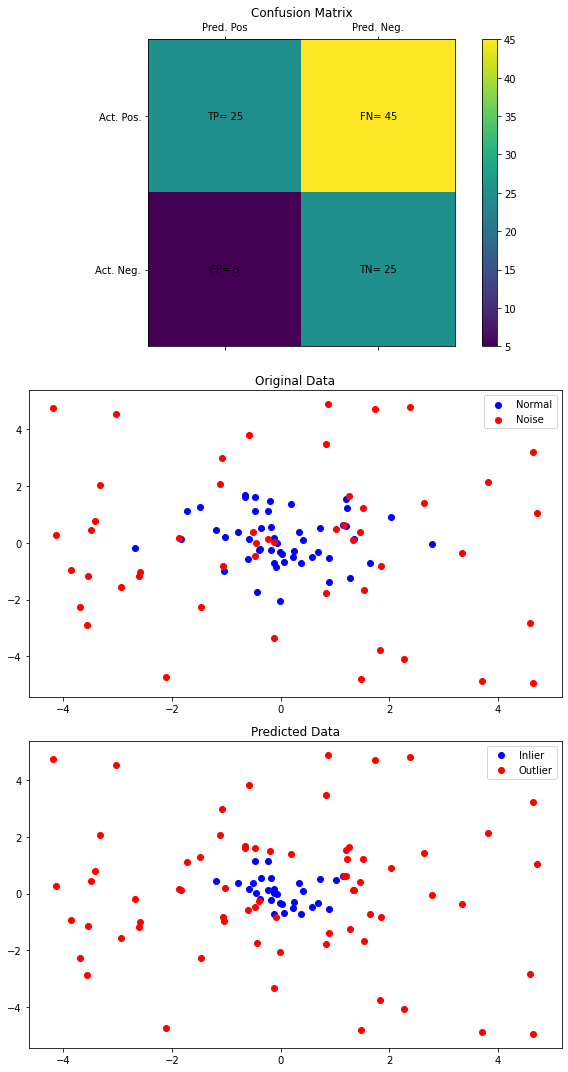

In [76]:
clf = OneClassSVM()

# Fit on Normal data
clf.fit(x_normal)

plot_outliers(clf, x_normal, x_noise)